[<font color='steelblue'>1. - __EDA__</font>](#one-bullet) <br>
    [<font color='steelblue'>1.1. - Imports</font>](#two-bullet) <br>
    [<font color='steelblue'>1.2. - Initial Analysis</font>](#three-bullet) <br>
    [<font color='steelblue'>1.3. - Data Preprocessing</font>](#four-bullet) <br>
        [<font color='steelblue'>1.3.1. - Missing values</font>](#four_one-bullet) <br>
        [<font color='steelblue'>1.3.2. - Feature Engineering</font>](#four_two-bullet) <br>
        [<font color='steelblue'>1.3.3. - Outliers</font>](#four_three-bullet) <br>
        [<font color='steelblue'>1.3.4. - All text in english</font>](#four_four-bullet) <br>
        [<font color='steelblue'>1.3.5. - Text cleaning</font>](#four_five-bullet) <br>
        [<font color='steelblue'>1.3.6. - Removing unsual words</font>](#four_six-bullet) <br>
    [<font color='steelblue'>1.4. - Corpus Splitting</font>](#five-bullet) <br>
    [<font color='steelblue'>1.5. - Embeddings</font>](#six-bullet) <br>
        [<font color='steelblue'>1.5.1. - Bag of Words (BoW)</font>](#six_one-bullet) <br>
        [<font color='steelblue'>1.5.2. - TF-IDF</font>](#six_two-bullet) <br>
        [<font color='steelblue'>1.5.3. - Word2Vec</font>](#six_three-bullet) <br>
        [<font color='steelblue'>1.5.4. - GloVe</font>](#six_four-bullet) <br>
        [<font color='steelblue'>1.5.5. - RoBERTa</font>](#six_five-bullet) <br>
    [<font color='steelblue'>1.6. - SMOTE</font>](#seven-bullet) <br>

[<font color='steelblue'>2. - __Models__</font>](#eight-bullet) <br>
    [<font color='steelblue'>2.1. - Functions</font>](#nine-bullet) <br>
    [<font color='steelblue'>2.2. - Models</font>](#ten-bullet) <br>
    [<font color='steelblue'>2.3. - PreTrained Models</font>](#eleven-bullet) <br>
    [<font color='steelblue'>2.4. - Results</font>](#twelve-bullet) <br>

Group 7
|Name | Student ID |
|----|----|
|Joana Rodrigues| 20240603|
|Mara Simões| 20240326|
|Matilde Street| 20240523|
|Rafael Silva| 20240511|

<hr>
<a class="anchor" id="one-bullet"> 
<d style="color:white;">

# 1. EDA
</a> 
</d>   

<a class="anchor" id="two-bullet"> 
<d style="color:white;">

## 1.1. Imports
</a> 
</d>   

In [52]:
# Basic utilities for data handling, analysis, and visualization
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Progress bar for loops and long-running processes
from tqdm import tqdm

# Tools for creating visual representations of text
from wordcloud import WordCloud

# Core NLP tools for text cleaning, tokenization, and linguistic processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
# from langdetect import detect
# from googletrans import Translator

# Machine learning tools for model training, evaluation, and vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# Word embedding and vectorization using Gensim
from gensim.models import Word2Vec
import gensim.downloader

# Neural networks and deep learning using Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Masking
from tensorflow.keras.utils import to_categorical

# Transformers and pre-trained models from Hugging Face
import torch
from transformers import (
    BertTokenizer, BertModel, RobertaTokenizer, RobertaModel,
    MarianMTModel, MarianTokenizer, pipeline
)

# Additional libraries for advanced modeling and preprocessing
import xgboost as xgb
import fasttext
from imblearn.over_sampling import SMOTE


In [53]:
# to read our data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.DataFrame(data=df_train, columns=['text', 'label']).reset_index(drop=True)
df_test = pd.DataFrame(data=df_test, columns=['text', 'label']).reset_index(drop=True)

print(df_train.head())

                                                text  label
0  $BYND - JPMorgan reels in expectations on Beyo...      0
1  $CCL $RCL - Nomura points to bookings weakness...      0
2  $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3  $ESS: BTIG Research cuts to Neutral https://t....      0
4  $FNKO - Funko slides after Piper Jaffray PT cu...      0


In [54]:
# copy of the df to apply in pre-trained models without data cleaning
df_train_raw = df_train.copy()

<a class="anchor" id="three-bullet"> 
<d style="color:white;">

## 1.2. Initial Analysis
</a> 
</d>   

In [55]:
print('Initial dataset contains ', df_train.shape[0], 'rows and ', df_train.shape[1], 'columns')

Initial dataset contains  9543 rows and  2 columns


The dataset contains 3 unique labels to predict.
label
2    6178
1    1923
0    1442
Name: count, dtype: int64


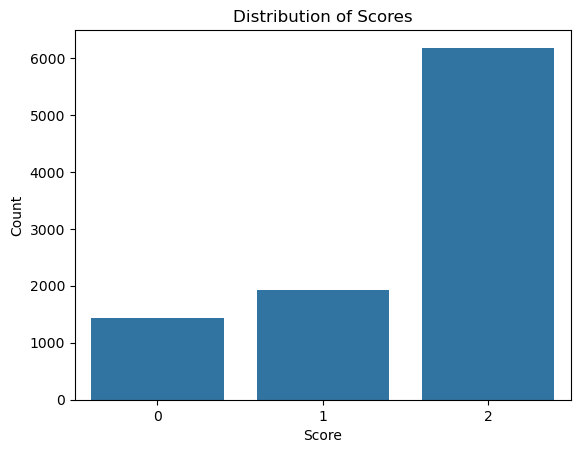

In [56]:
print('The dataset contains', df_train['label'].nunique(), 'unique labels to predict.')
print(df_train['label'].value_counts())

# Visualize distribution of satisfaction
sns.countplot(data=df_train, x='label')
plt.title("Distribution of Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

In [57]:
df_train['label'].describe()

count    9543.000000
mean        1.496280
std         0.743139
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: label, dtype: float64

<Axes: >

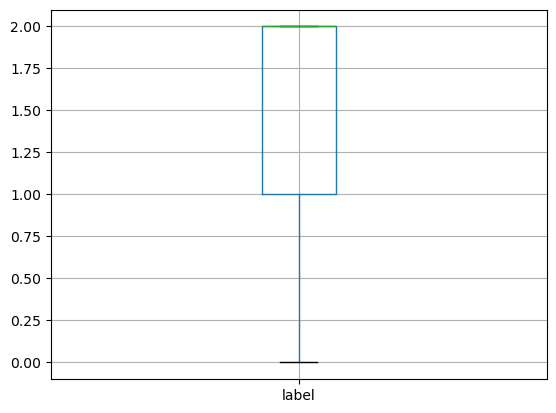

In [58]:
df_train.boxplot(['label'])

To see the words that appear the most in our dataset

In [59]:
all_words = ' '.join(df_train['text']).split()
freq = pd.Series(all_words).value_counts()
freq.sort_values(ascending=False)[0:10]

to     2332
the    1820
of     1464
-      1390
in     1361
on     1136
for    1032
a       970
and     898
The     663
Name: count, dtype: int64

There appears the same word 'the' for example twice because it is in lower and upper case. Therefore we will have to deal with that in the preprocessing steps.

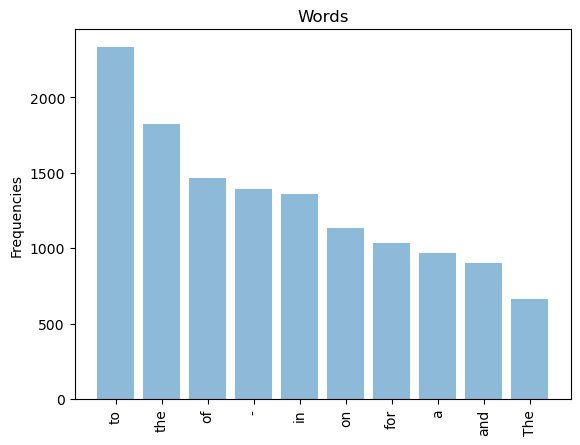

In [60]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

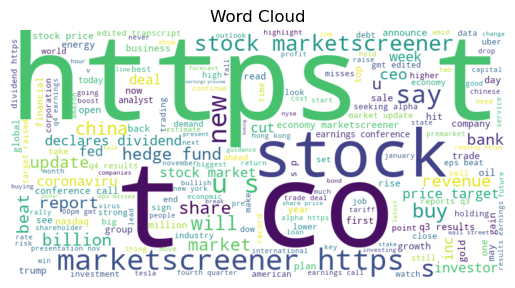

In [61]:
raw_text = ' '.join(df_train['text'].fillna('')).lower()
raw_wc = WordCloud(width=800, height=400, background_color='white').generate(raw_text)
plt.imshow(raw_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

<a class="anchor" id="four-bullet"> 
<d style="color:white;">

## 1.3. Data Preprocessing
</a> 
</d>   

<a class="anchor" id="four_one-bullet"> 
<d style="color:white;">

### 1.3.1. Missing values
</a> 
<!-- </d>    -->

In [62]:
if df_train.isnull().sum().sum() > 0:
    print('There are missing values in the dataset')
else: 
    print('There are no missing values in the dataset')  

There are no missing values in the dataset


<a class="anchor" id="four_two-bullet"> 
<d style="color:white;">

### 1.3.2. Feature Engineering
</a> 
</d>   

To help us visualize the content of our dataset, we will create two new columns: one that counts the total number of characters in each tweet, and another that counts the total number of words.

In [63]:
df_train['text_length'] = df_train['text'].apply(len)
df_train['word_count']  = df_train['text'].apply(lambda x: len(str(x).split(" ")))

In [64]:
# Count how many tweets have less than 7 characters
num_short_tweets = (df_train['text_length'] < 7).sum()

# Calculate the percentage of tweets with less than 7 characters
percentage_short_tweets = (df_train['text_length'] < 7).mean() * 100

print(f"Number of tweets with less than 7 characters: {num_short_tweets}")
print(f"Percentage: {percentage_short_tweets:.2f}%")

Number of tweets with less than 7 characters: 21
Percentage: 0.22%


Since the percentage of tweets in our dataset with less than 7 characters is very low,  it doesn't even reach 1%, and given that tweets with this length may not be representative or useful for the development of our model, we have decided to remove all entries from the dataset with fewer than 7 characters.

In [65]:
df_train = df_train[df_train['text'].str.len() >= 7]

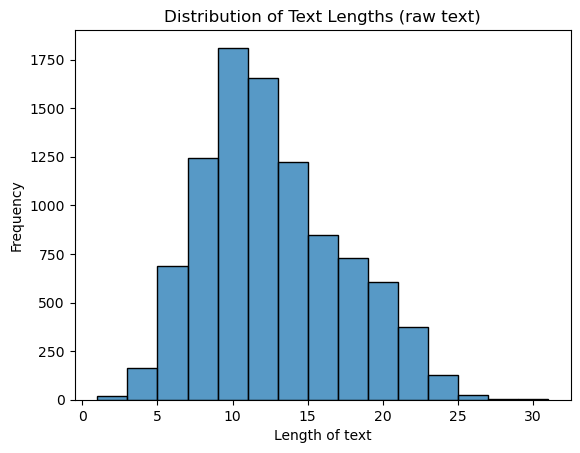

In [66]:
#Plot distribution of text length
sns.histplot(df_train['word_count'], bins=15)
plt.title("Distribution of Text Lengths (raw text)")
plt.xlabel("Length of text")
plt.ylabel("Frequency")
plt.show()

In [67]:
df_train.word_count.describe()

count    9522.000000
mean       12.192712
std         4.626671
min         1.000000
25%         9.000000
50%        11.000000
75%        15.000000
max        31.000000
Name: word_count, dtype: float64

<a class="anchor" id="four_three-bullet"> 
<d style="color:white;">

### 1.3.3. Outliers
</a> 
</d>   

In [68]:
to_remove = df_train['text_length'].quantile(0.005)

print('We will eliminate the texts with less than', to_remove, 'length')  #0.5 percentile

#to see where the labels of the errors
removed_labels = df_train[df_train['text_length'] < 18]['label'].value_counts()
print(removed_labels)

#to see what is being eliminated:
removed = df_train.loc[df_train['text_length'] < 18, ['text', 'label', 'text_length']]
print(removed)

df_train = df_train[df_train['text_length'] >= 18]
df_train = df_train[df_train['text_length'] >= 18].reset_index(drop=True)

We will eliminate the texts with less than 22.0 length
label
2    21
1     5
Name: count, dtype: int64
                   text  label  text_length
1858   SASA聚酯选用英威达PTA技术      2           16
3090          Brent +4%      1            9
3948            @TicToc      2            7
3980      100% Correct!      2           13
4358  Cya Jason Garrett      2           17
4914         Next week.      2           10
5006      Racing on Ice      2           13
5484    Wholesale Trade      2           15
5512         Woke Sachs      2           10
5654         $penn coin      2           10
6511     Housing Starts      2           14
6849     Nasdaq up 0.2%      1           14
6990  Averages end flat      2           17
7935      $WW heavy....      1           13
8055          Long $WMT      1            9
8153    $APOP on scans.      2           15
8167       $CEI Woke up      2           12
8188     $ETSY 37 to 43      2           14
8235  $NIO on the move.      2           17
8276    $SPY $TNX

<a class="anchor" id="four_four-bullet"> 
<d style="color:white;">

### 1.3.4. All text in english
</a> 
</d>   

In [69]:
# FOR THIS WE HAVE TO HAVE LOCALLY INSTALLED lid.176.bin

model = fasttext.load_model("lid.176.bin")

def detect_language_fasttext(text):
    try:
        text_cleaned = text.replace('\n', ' ').strip()
        prediction = model.predict(text_cleaned)[0][0]
        return prediction.replace("__label__", "")
    except:
        return "unknown"

df_train['language'] = df_train['text'].apply(detect_language_fasttext)
print(df_train['language'].value_counts())


language
en    9420
de      21
es      14
it      10
fr       8
nl       6
ja       5
pt       3
fi       2
hu       1
vi       1
sv       1
cs       1
zh       1
da       1
is       1
Name: count, dtype: int64


In [70]:
SUPPORTED_LANGS = ['en', 'fr', 'es', 'de', 'it', 'nl', 'ru', 'zh', 'ja', 'ar', 'fi', 'hu', 'vi', 'sv', 'cs', 'da', 'is']
loaded_models = {}

def load_translation_model(src_lang):
    """
    Load and cache a MarianMT translation model for a given source language.

    Parameters:
    src_lang (str): Source language code (e.g., 'fr', 'es', 'de').

    Returns:
    tuple: Tokenizer and model for the given source language.
    """

    model_name = f'Helsinki-NLP/opus-mt-{src_lang}-en'
    if model_name not in loaded_models:
        tokenizer = MarianTokenizer.from_pretrained(model_name)
        model = MarianMTModel.from_pretrained(model_name)
        loaded_models[model_name] = (tokenizer, model)
    return loaded_models[model_name]

def translate_text(text, src_lang):
    """
    Translate a given text to English if it is in a supported non-English language.

    Parameters:
    text (str): Text to be translated.
    src_lang (str): Language code of the text.

    Returns:
    str: Translated text in English or original text if translation is not applicable.
    """
    
    if src_lang == 'en' or src_lang not in SUPPORTED_LANGS:
        return text  
    try:
        tokenizer, model = load_translation_model(src_lang)
        batch = tokenizer([text], return_tensors="pt", padding=True, truncation=True)
        generated = model.generate(**batch)
        translated = tokenizer.decode(generated[0], skip_special_tokens=True)
        return translated
    except Exception as e:
        print(f"Erro ao traduzir ({src_lang}): {e}")
        return text

df_train['translated_text'] = [
    translate_text(text, lang)
    for text, lang in tqdm(zip(df_train['text'], df_train['language']), total=len(df_train))]


# to see it its translating well:
df_train[df_train['language'] == 'fr']

100%|██████████| 9496/9496 [00:00<00:00, 416404.71it/s]

Erro ao traduzir (es): 
MarianTokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Erro ao traduzir (de): 
MarianTokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Erro ao traduzir (fr): 
MarianTokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. P

,text,label,text_length,word_count,language,translated_text
1449,Eudonet annonce un chiffre d’affaires récurren...,2,82,13,fr,Eudonet annonce un chiffre d’affaires récurren...
1837,Rio Tinto’s Giant Mongolia Project Dealt Anoth...,2,53,6,fr,Rio Tinto’s Giant Mongolia Project Dealt Anoth...
1961,Tinyclues accélère sa croissance en 2019,2,40,6,fr,Tinyclues accélère sa croissance en 2019
4313,Cloudia lance la dernière génération de soluti...,2,93,13,fr,Cloudia lance la dernière génération de soluti...
4777,Korian s’associe à Omedys pour développer le p...,2,114,16,fr,Korian s’associe à Omedys pour développer le p...
5342,Total : Résultats du quatrième trimestre et de...,2,59,10,fr,Total : Résultats du quatrième trimestre et de...
5488,Will China Declare Force Majeure If Virus Situ...,2,60,9,fr,Will China Declare Force Majeure If Virus Situ...
8672,Is Les Hôtels de Paris (EPA:HDP) Using Too Muc...,2,53,10,fr,Is Les Hôtels de Paris (EPA:HDP) Using Too Muc...


<a class="anchor" id="four_five-bullet"> 
<d style="color:white;">

### 1.3.5. Text cleaning
</a> 
</d>   

Application of a formula that will:
1. Remove the stopwords
2. Stemeatize & Lematize
3. Put everything in lowercase
3. Remove weird characters

In [71]:
# Set of English stopwords to filter out common, uninformative words
stop = set(stopwords.words('english'))
print(stop)

# Snowball stemmer to reduce words to their root form
stemmer = SnowballStemmer('english')

# WordNet lemmatizer to convert words to their base or dictionary form
lemma = WordNetLemmatizer()


# Cleaning Function
def clean(text_list, stopwords=True, lemmatize=True, stem=False, correct_spelling=False):
    """
    Clean a list of text strings by applying lowercasing, regex filters, and optional NLP steps.

    Parameters:
    text_list (list): List of text entries (strings) to clean.
    stopwords (bool): If True, removes English stopwords.
    lemmatize (bool): If True, applies lemmatization to each word.
    stem (bool): If True, applies stemming to each word (not recommended with lemmatization).
    correct_spelling (bool): If True, applies spelling correction (slow process).

    Returns:
    list: List of cleaned text strings.
    """

    cleaned = []
    for text in tqdm(text_list):
        text = text.lower()                                            # convert text to lowercase
        text = re.sub(r"http\S+", "", text)                            # remove links
        text = re.sub("[^a-zA-Z]", " ", text)                          # remove numbers and non-alphabetic characters
        text = re.sub("br", "", text)                                  # remove occurrences of "br" (often from HTML tags)
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove extra punctuation
        

        if stopwords:
            text = " ".join([word for word in text.split() if word not in stop])

        if correct_spelling:
            text = str(TextBlob(text).correct())

        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())

        if stem:
            text = " ".join(stemmer.stem(word) for word in text.split())

        cleaned.append(text)

    return cleaned

# Initial cleaning: remove empty or None entries
df_train = df_train[df_train['translated_text'].notnull()]
df_train = df_train[df_train['translated_text'].str.strip() != ""]

df_test = df_test[df_test['text'].notnull()]
df_test = df_test[df_test['text'].str.strip() != ""]

# Apply cleaning function
df_train['clean_text'] = clean(df_train['translated_text'], stopwords=True, lemmatize=True, stem=False, correct_spelling=False)
df_test['clean_text'] = clean(df_test['text'], stopwords=True, lemmatize=True, stem=False, correct_spelling=False)

# View original and cleaned texts
df_train[['text', 'clean_text']].head()

{'am', 't', 'he', 'y', 'myself', "they'll", 'aren', "it's", 'wasn', 'were', "we'd", 'on', 'such', 'than', "that'll", 'each', 'itself', 'our', "we're", "wasn't", 'does', 'only', 'ma', 'the', 'didn', 'further', 'this', 're', 'yourself', "it'd", 'most', "he'd", 'your', 'having', 'don', 'about', "doesn't", 'as', 'under', 'being', "don't", "should've", 'whom', 'herself', 'been', 'off', 'ourselves', 'had', 'isn', 'shan', 'those', 'are', 'into', "i'm", 'or', "they're", 'm', 'just', 'himself', 'some', 'of', 'she', 'should', 'same', 'their', 'during', 'between', 'for', 'shouldn', "it'll", "isn't", "he'll", 'down', 'to', 'yours', 'too', 'from', "he's", 'what', 'but', 'while', 'me', 's', "they've", 'where', 'up', 'ain', 'couldn', 'won', 'we', 'that', "shan't", 'my', 'how', 'hers', 'and', 'weren', 'its', 'not', "haven't", 'd', 'his', 'out', 'doing', 'why', 'after', 'any', 'needn', 'them', 'll', 'own', "she'll", "you've", 'is', 'him', 'it', 'both', "didn't", 'once', "needn't", 'did', 'now', "she's"

100%|██████████| 2388/2388 [00:00<00:00, 8922.01it/s] 


,text,clean_text
0,$BYND - JPMorgan reels in expectations on Beyo...,bynd jpmorgan reel expectation beyond meat
1,$CCL $RCL - Nomura points to bookings weakness...,ccl rcl nomura point booking weakness carnival...
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",cx cemex cut credit suisse j p morgan weak bui...
3,$ESS: BTIG Research cuts to Neutral https://t....,es btig research cut neutral
4,$FNKO - Funko slides after Piper Jaffray PT cu...,fnko funko slide piper jaffray pt cut


<a class="anchor" id="four_six-bullet"> 
<d style="color:white;">

### 1.3.6. Removing unsual words
</a> 
</d>   

To further reduce noise in our dataset and improve the potential performance of our models, we will remove all words that appear only once in the dataset, as these are extremely rare and likely insignificant for our problem.

In [72]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['clean_text'])
words = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)
words_once = [word for word, count in zip(words, word_counts) if count == 1]

print("Words that appear only once:", words_once)

Words that appear only once: ['aaa', 'aaham', 'aams', 'aaon', 'aav', 'aaww', 'aaza', 'abalone', 'abandoned', 'abandoning', 'abbott', 'abe', 'abebe', 'aben', 'abeo', 'aberdeen', 'abeviated', 'abiy', 'abn', 'abo', 'abolish', 'aborted', 'absol', 'absorb', 'absurdity', 'abu', 'abukarsh', 'abusing', 'abv', 'academic', 'acceleron', 'acceleronpharma', 'accendowave', 'acceptance', 'accessing', 'accesswi', 'acciones', 'accommodate', 'accomplish', 'accomplished', 'accor', 'accordi', 'accordingly', 'accretive', 'accumulated', 'accumulating', 'accuracy', 'accurately', 'accusation', 'accuses', 'acea', 'acelerada', 'acelrx', 'ach', 'achieved', 'achieving', 'acknowledged', 'acknowledging', 'acme', 'acmr', 'acorncapitalinvestmentfund', 'acqu', 'acquisizioni', 'acquittal', 'acrx', 'actinogen', 'actinogenmedical', 'activated', 'activates', 'actividades', 'activism', 'actuall', 'actuarial', 'acu', 'acui', 'acw', 'adam', 'adani', 'adapt', 'addict', 'addicted', 'adecco', 'adenatfriedman', 'adesco', 'adesto

In [73]:
words_once_set = set(words_once)

def remove_rare_words(text):
    """
    Remove words from a text string that appear only once in the training corpus.

    Parameters:
    text (str): The input text to clean.

    Returns:
    str: The text with rare words removed (i.e., words that appear only once in the corpus).
    """
    
    return ' '.join([word for word in text.split() if word not in words_once_set])

df_train['clean_text'] = df_train['clean_text'].apply(remove_rare_words)

<a class="anchor" id="five-bullet"> 
<d style="color:white;">

## 1.4. Corpus Splitting
</a> 
</d>   

Since we initially preserved the original content of our dataset, we will use it to test two different modeling approaches. The first uses the cleaned version of our dataset, with all the preprocessing steps applied throughout this notebook, which will be used for more traditional models (e.g. Logistic Regression and KNN). The second approach uses the untouched, original version of the dataset, which will be used with pre-trained models such as BERT and RoBERTa. To proceed, we begin by splitting each version of the dataset into training and validation sets.

In [74]:
# SPLIT FOR MODELS WITH CLEANED TEXT
X_train = df_train['clean_text']
y_train = df_train['label'] 

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=df_train['label'], random_state=42)

In [75]:
# 2. SPLIT FOR MODELS WITH RAW TEXT (FOR PRE-TRAINED MODELS)
X_raw = df_train_raw['text']
y_raw = df_train_raw['label']

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size=0.2, stratify=y_raw, random_state=42)

<a class="anchor" id="six-bullet"> 
<d style="color:white;">

## 1.5. Embeddings
</a> 
</d>   

In [76]:
def bow_or_tfidf(texts = df_train['clean_text'], method='bow'):
    """
    Convert a list of text documents into a numerical feature matrix using either
    Bag of Words (BoW) or TF-IDF vectorization.

    Parameters:
    texts (list or pandas Series): Collection of text documents to vectorize.
    method (str): Vectorization method to use. Must be either 'bow' or 'tfidf'.

    Returns:
    tuple: A tuple containing:
        - X (scipy sparse matrix): The document-term matrix.
        - vectorizer (CountVectorizer or TfidfVectorizer): The fitted vectorizer instance.

    Raises:
    ValueError: If the provided method is not 'bow' or 'tfidf'.
    """
    
    if method == 'bow':
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(texts)
        return X, vectorizer

    elif method == 'tfidf':
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(texts)
        return X, vectorizer

    else:
        raise ValueError("Choose a valid method: 'bow', 'tfidf'.")

# X_train, vectorizer = bow_or_tfidf(df_train['clean_text'], method='bow')
# X_train, vectorizer = bow_or_tfidf(df_train['clean_text'], method='tfidf')

<a class="anchor" id="six_one-bullet"> 
<d style="color:white;">

### 1.5.1. Bag of Words (BoW)
</a> 
</d>   

In [77]:
X_train_bow, vectorizer = bow_or_tfidf(X_train, method='bow')
X_val_bow = vectorizer.transform(X_val)
#X_test_bow = vectorizer.transform(df_test['clean_text']) 

<a class="anchor" id="six_two-bullet"> 
<d style="color:white;">

### 1.5.2. TF-IDF
</a> 
</d>   

In [78]:
X_train_tfidf, vectorizer = bow_or_tfidf(X_train, method='tfidf')
X_val_tfidf = vectorizer.transform(X_val)
#X_test_tfidf = vectorizer.transform(df_test['clean_text']) 

<a class="anchor" id="six_three-bullet"> 
<d style="color:white;">

### 1.5.3 Word2Vec
</a> 
</d>   

In [79]:
# Train the model only once using the training data
tokenized_train = [text.split() for text in X_train]
model = Word2Vec(
    sentences=tokenized_train,
    vector_size=100,   
    window=2,          
    min_count=1,       # Minimum word frequency to be included
    sg=1               # Skip-gram model (if 0, uses CBOW)
)
word_vectors = model.wv  # Extract trained word vectors

def get_doc_embedding(doc, word_vectors, dim=100):
    """
    Convert a text document into a single vector by averaging its word embeddings.

    Parameters:
    doc (str): The document (string of text) to embed.
    word_vectors (gensim KeyedVectors): Trained word embeddings.
    dim (int): The dimensionality of the embeddings (default is 100).

    Returns:
    numpy.ndarray: The averaged vector representing the document.
                   If no known words are found, returns a zero vector.
    """
    tokens = doc.split()
    vectors = [word_vectors[word] for word in tokens if word in word_vectors.index_to_key]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

# Generate document-level embeddings by averaging the vectors of each word
X_train_emb = np.vstack([get_doc_embedding(doc, word_vectors) for doc in X_train])
X_val_emb = np.vstack([get_doc_embedding(doc, word_vectors) for doc in X_val])


<a class="anchor" id="six_four-bullet"> 
<d style="color:white;">

### 1.5.4 GloVe
</a> 
</d>   

In [80]:
model_name = 'glove-twitter'
emb_size = 100

w2v = gensim.downloader.load(f'{model_name}-{emb_size}')

def corpus2vec(corpus, w2v):
    """
    Convert a list of text documents into lists of word vectors using a pre-trained GloVe model.

    Parameters:
    corpus (list): List of strings, each representing a document (e.g., tweet).
    w2v (gensim KeyedVectors): Pre-trained word vectors loaded via gensim.

    Returns:
    list: A list where each element is a list of word vectors corresponding to the words in a document.
    """
    index_set = set(w2v.index_to_key)  # For fast lookup
    word_vec = w2v.get_vector          # Shortcut for faster access
    return [
        [word_vec(word) for word in doc.split() if word in index_set]
        for doc in tqdm(corpus)
    ]

# Apply to training and validation data
x_train_vec = corpus2vec(X_train, w2v)
x_val_vec = corpus2vec(X_val, w2v)

# Function to convert each tweet into a single vector (average of its word vectors)
def average_vectors(vector_list, dim):
    """
    Compute the average vector for a list of word vectors.
    If the list is empty, return a zero vector.

    Parameters:
    vector_list (list): List of word vectors (e.g., from a tweet).
    dim (int): Dimensionality of the embeddings.

    Returns:
    numpy.ndarray: Averaged vector representation of the input list.
    """
    return np.mean(vector_list, axis=0) if vector_list else np.zeros(dim)

# Generate averaged document embeddings for training and validation sets
X_train_glove_avg = np.vstack([average_vectors(vecs, emb_size) for vecs in x_train_vec])
X_val_glove_avg = np.vstack([average_vectors(vecs, emb_size) for vecs in x_val_vec])


100%|██████████| 1900/1900 [00:00<00:00, 21196.26it/s]


In [81]:
# Just a simple test to understand the results and performance of the model
w2v.most_similar('happy', topn=10)

[('birthday', 0.9259342551231384),
 ('day', 0.8549739718437195),
 ('bday', 0.814542829990387),
 ('merry', 0.7886534929275513),
 ('love', 0.785590648651123),
 ('wish', 0.7771797776222229),
 ('hope', 0.7660955190658569),
 ('thank', 0.7639737725257874),
 ('year', 0.750583291053772),
 ('thanks', 0.7475084066390991)]

<a class="anchor" id="six_five-bullet"> 
<d style="color:white;">

### 1.5.5 RoBERTa
</a> 
</d>   

In [82]:
# Load pretrained RoBERTa model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')
model.eval()  # Set to eval mode
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Function to convert corpus to embeddings (Corpus2Vec using [CLS] token)
def roberta_corpus2vec(corpus, tokenizer, model, max_length=128):
    """
    Generate sentence embeddings for a list of documents using the [CLS] token from RoBERTa.

    Parameters:
    corpus (list): List of raw text documents (e.g., tweets).
    tokenizer (transformers.PreTrainedTokenizer): Tokenizer corresponding to the RoBERTa model.
    model (transformers.PreTrainedModel): Pretrained RoBERTa model.
    max_length (int): Maximum sequence length to tokenize each document.

    Returns:
    np.ndarray: Matrix of embeddings, one per document (shape: num_docs × hidden_size).
    """
    
    embeddings = []
    with torch.no_grad():
        for doc in tqdm(corpus):
            inputs = tokenizer(doc, return_tensors='pt', padding='max_length',
                               truncation=True, max_length=max_length)
            inputs = {k: v.to(device) for k, v in inputs.items()}
            outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze(0)  # CLS token
            embeddings.append(cls_embedding.cpu().numpy())
    return np.vstack(embeddings)

# Encode train and validation sets with original (raw) text
X_train_roberta = roberta_corpus2vec(X_train_raw, tokenizer, model)
X_val_roberta = roberta_corpus2vec(X_val_raw, tokenizer, model)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 1909/1909 [05:19<00:00,  5.98it/s]


<a class="anchor" id="seven-bullet"> 
<d style="color:white;">

## 1.6. SMOTE
</a> 
</d>   

We are going to use SMOTE to handle data imbalance in some models where is not possible to apply class weights.

In [83]:
# Juste to check if the trains have the same size and the smote will work
print(X_train_raw.shape)
print(y_train_raw.shape)

(7634,)
(7634,)


In [84]:
smote = SMOTE(random_state=13)

X_train_roberta_resampled, y_train_resampled = smote.fit_resample(X_train_roberta, y_train_raw)

# X_train_glove_avg_resampled, y_train_resampled = smote.fit_resample(X_train_glove_avg, y_train)
# X_train_emb_resampled, y_train_resampled = smote.fit_resample(X_train_emb, y_train)
# X_train_bow_resampled, y_train_resampled = smote.fit_resample(X_train_bow, y_train)
# X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

<hr>
<a class="anchor" id="eight-bullet"> 
<d style="color:white;">

# 2. Models
</a> 
</d>   

<a class="anchor" id="nine-bullet"> 
<d style="color:white;">

## 2.1. Functions
</a> 
</d>   

### 2.1.1. Function for evaluation of the model

In [85]:
def evaluate_model_predictions(y_pred_train, y_pred_val, y_train = y_train, y_val = y_val, show_confusion_matrix = True, show_classification_report = True):
    """
    Evaluate the performance of a classification model on training and validation sets.

    Computes and prints accuracy, F1-score (macro), precision, and recall for both sets.
    Optionally displays the confusion matrix and detailed classification report for the validation set.

    Parameters:
    y_pred_train (array-like): Predicted labels for the training set.
    y_pred_val (array-like): Predicted labels for the validation set.
    y_train (array-like, optional): True labels for the training set.
    y_val (array-like, optional): True labels for the validation set.
    show_confusion_matrix (bool): If True, prints the confusion matrix for the validation set.
    show_classification_report (bool): If True, prints the classification report for the validation set.

    Returns:
    tuple: A tuple containing:
        - train_accuracy (float)
        - train_f1 (float)
        - val_accuracy (float)
        - val_f1 (float)
    """
    
    # to get the accurancy and the macro f1 score of the model on the training set
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train, average='macro')
    
    # to get the accurancy and the macro f1 score of the model on the validation set
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_f1 = f1_score(y_val, y_pred_val, average='macro')

    # to get the precision and the recall of the model on the validation set
    val_precision = precision_score(y_val, y_pred_val, average='macro')
    val_recall = recall_score(y_val, y_pred_val, average='macro')

    print(f"Accuracy of train: {train_accuracy:.4f}")
    print(f"F1 Macro (Train): {train_f1:.4f}")
    print(f"Accuracy of val: {val_accuracy:.4f}")
    print(f"\033[1mF1 Macro (Val)\033[0m: {val_f1:.4f}")
    print(f"Precision (Val): {val_precision:.4f}")
    print(f"Recall (Val): {val_recall:.4f}")
    
    # to get the confusion matrix and the classification report of the model on the validation set
    if show_confusion_matrix==True:
        print('\nConfusion Matrix for Validation Data:')    
        print(confusion_matrix(y_val, y_pred_val))

    if show_classification_report==True:
        print('\nClassification Report for Validation Data:')
        print(classification_report(y_val, y_pred_val))

    return train_accuracy, train_f1, val_accuracy, val_f1

<a class="anchor" id="ten-bullet"> 
<d style="color:white;">

## 2.2. Classification Models
</a> 
</d> 

Now that we have our embeddings, we are going to test different combinations of embeddings and well-known models.

NOTE: For all our models, we tested all possible combinations with our four embeddings. However, due to very weak or inconclusive results, we decided not to include them in our notebook.

### 2.2.1. Naive Bayes

#### With BOW

In [86]:
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)
y_pred_train = nb.predict(X_train_bow)
y_pred_val = nb.predict(X_val_bow)

nb_bow_train_accuracy, nb_bow_train_f1_macro, nb_bow_val_accuracy, nb_bow_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val=y_pred_val)

Accuracy of train: 0.8836
F1 Macro (Train): 0.8471
Accuracy of val: 0.7742
F1 Macro (Val): 0.6831
Precision (Val): 0.7035
Recall (Val): 0.6686

Confusion Matrix for Validation Data:
[[ 143   52   93]
 [  25  239  120]
 [  59   80 1089]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.63      0.50      0.56       288
           1       0.64      0.62      0.63       384
           2       0.84      0.89      0.86      1228

    accuracy                           0.77      1900
   macro avg       0.70      0.67      0.68      1900
weighted avg       0.77      0.77      0.77      1900



#### With TF-IDF

In [89]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_train = nb.predict(X_train_tfidf)
y_pred_val = nb.predict(X_val_tfidf)

# Results
nb_idf_train_accuracy, nb_idf_train_f1_macro, nb_idf_val_accuracy, nb_idf_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val=y_pred_val)

Accuracy of train: 0.7848
F1 Macro (Train): 0.6437
Accuracy of val: 0.7347
F1 Macro (Val): 0.5344
Precision (Val): 0.8163
Recall (Val): 0.5020

Confusion Matrix for Validation Data:
[[  46   17  225]
 [   4  138  242]
 [   0   16 1212]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.92      0.16      0.27       288
           1       0.81      0.36      0.50       384
           2       0.72      0.99      0.83      1228

    accuracy                           0.73      1900
   macro avg       0.82      0.50      0.53      1900
weighted avg       0.77      0.73      0.68      1900



After testing the Naive Bayes model, a probabilistic classifier based on Bayes' Theorem that assumes conditional independence between features, with our two embedding methods (Bag of Words and TF-IDF), we observed that the BoW approach achieved better overall performance.

By analyzing the evaluation metrics, we found that BoW obtained a higher macro F1-score on the validation set, which is the most important metric when dealing with imbalanced classes, as it treats all classes equally. It also showed better recall, indicating broader coverage across all classes, and greater robustness during training, with superior F1 and accuracy scores compared to TF-IDF.

On the other hand, TF-IDF achieved higher precision, meaning that although it made fewer correct predictions overall, the ones it did make were more confident. This combination of high precision but lower F1 and recall may suggest that the model is overfitting on more distinctive or rare terms emphasized by the TF-IDF weighting.

In summary, for this model, BoW provided a more balanced and effective performance, making it the more suitable embedding technique in this context.

### 2.2.2. Logistic Regression 

#### With BOW

In [90]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_bow, y_train)
y_pred_train = lr.predict(X_train_bow)
y_pred_val = lr.predict(X_val_bow)

# Results:
lr_bow_train_accuracy, lr_bow_train_f1_macro, lr_bow_val_accuracy, lr_bow_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val =y_pred_val)

Accuracy of train: 0.9502
F1 Macro (Train): 0.9392
Accuracy of val: 0.7768
F1 Macro (Val): 0.7014
Precision (Val): 0.6984
Recall (Val): 0.7054

Confusion Matrix for Validation Data:
[[ 179   41   68]
 [  45  245   94]
 [  91   85 1052]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       288
           1       0.66      0.64      0.65       384
           2       0.87      0.86      0.86      1228

    accuracy                           0.78      1900
   macro avg       0.70      0.71      0.70      1900
weighted avg       0.78      0.78      0.78      1900



#### With TF-IDF

In [91]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced') 
lr.fit(X_train_tfidf, y_train)
y_pred_train = lr.predict(X_train_tfidf)
y_pred_val = lr.predict(X_val_tfidf)

# Results:
lr_idf_train_accuracy, lr_idf_train_f1_macro, lr_idf_val_accuracy, lr_idf_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val =y_pred_val)

Accuracy of train: 0.9057
F1 Macro (Train): 0.8842
Accuracy of val: 0.7789
F1 Macro (Val): 0.7028
Precision (Val): 0.6998
Recall (Val): 0.7071

Confusion Matrix for Validation Data:
[[ 181   42   65]
 [  48  243   93]
 [  89   83 1056]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       288
           1       0.66      0.63      0.65       384
           2       0.87      0.86      0.86      1228

    accuracy                           0.78      1900
   macro avg       0.70      0.71      0.70      1900
weighted avg       0.78      0.78      0.78      1900



#### With Word2Vec

In [92]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_emb, y_train)

y_pred_train = clf.predict(X_train_emb)
y_pred_val = clf.predict(X_val_emb)

lr_emb_train_accuracy, lr_emb_train_f1_macro, lr_emb_val_accuracy, lr_idf_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val =y_pred_val)

Accuracy of train: 0.5517
F1 Macro (Train): 0.4561
Accuracy of val: 0.5489
F1 Macro (Val): 0.4386
Precision (Val): 0.4391
Recall (Val): 0.4446

Confusion Matrix for Validation Data:
[[ 84  73 131]
 [ 86 146 152]
 [240 175 813]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.20      0.29      0.24       288
           1       0.37      0.38      0.38       384
           2       0.74      0.66      0.70      1228

    accuracy                           0.55      1900
   macro avg       0.44      0.44      0.44      1900
weighted avg       0.59      0.55      0.56      1900



#### With Roberta

In [93]:
# Train classifier with balanced class weights
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_roberta, y_train_raw)

# Predict and evaluate
y_pred_train = clf.predict(X_train_roberta)
y_pred_val = clf.predict(X_val_roberta)

lr_train_acc, lr_train_f1, lr_val_acc, lr_val_f1 = evaluate_model_predictions(
    y_pred_train, y_pred_val, y_train=y_train_raw, y_val=y_val_raw, 
    show_confusion_matrix=True, show_classification_report=True)

Accuracy of train: 0.8068
F1 Macro (Train): 0.7650
Accuracy of val: 0.7999
F1 Macro (Val): 0.7457
Precision (Val): 0.7285
Recall (Val): 0.7740

Confusion Matrix for Validation Data:
[[ 218   31   39]
 [  45  283   57]
 [ 125   85 1026]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.56      0.76      0.64       288
           1       0.71      0.74      0.72       385
           2       0.91      0.83      0.87      1236

    accuracy                           0.80      1909
   macro avg       0.73      0.77      0.75      1909
weighted avg       0.82      0.80      0.81      1909



In the case of Logistic Regression, a linear model commonly used for classification tasks, which estimates class probabilities using a logistic function, we tested it with all four embeddings created. Overall, the combination of Logistic Regression with the RoBERTa embedding clearly emerged as the best-performing approach.

This configuration achieved the highest accuracy and macro F1-score on the validation set, indicating strong and balanced performance across all classes. It also obtained the highest precision, meaning that when the model predicts a class, it does so with high confidence. Additionally, it delivered the highest recall, showing that it successfully captures a broader range of true positives across all classes.

Our TF-IDF and BoW embeddings showed very similar performance, both achieving solid but slightly lower results compared to RoBERTa. Lastly, the Word2Vec embedding yielded the weakest results, significantly below the others in all key metrics. This underperformance suggests it may not be a reliable or effective representation for our specific task. Possible reasons include the limited training of the Word2Vec model (trained only on our small dataset) and the short length of tweets, which can make it harder for this embedding method to generate meaningful document-level vectors.

In summary, RoBERTa paired with Logistic Regression demonstrated the most robust and effective performance in our text classification scenario.

### 2.2.3. KNN

#### With BOW

In [94]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_bow, y_train)

y_pred_train = knn.predict(X_train_bow)
y_pred_val = knn.predict(X_val_bow)

knn_bow_train_accuracy, knn_bow_train_f1_macro, knn_bow_val_accuracy, knn_bow_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val=y_pred_val)

Accuracy of train: 0.7966
F1 Macro (Train): 0.6892
Accuracy of val: 0.7053
F1 Macro (Val): 0.5152
Precision (Val): 0.6625
Recall (Val): 0.4888

Confusion Matrix for Validation Data:
[[  53   20  215]
 [  10  131  243]
 [  23   49 1156]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.62      0.18      0.28       288
           1       0.66      0.34      0.45       384
           2       0.72      0.94      0.81      1228

    accuracy                           0.71      1900
   macro avg       0.66      0.49      0.52      1900
weighted avg       0.69      0.71      0.66      1900



#### With TF-IDF

In [102]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_tfidf, y_train)
y_pred_train = knn.predict(X_train_tfidf)
y_pred_val = knn.predict(X_val_tfidf)

# Results:
knn_idf_train_accuracy, knn_idf_train_f1_macro, knn_idf_val_accuracy, knn_idf_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val =y_pred_val)

Accuracy of train: 0.8025
F1 Macro (Train): 0.6962
Accuracy of val: 0.6953
F1 Macro (Val): 0.4463
Precision (Val): 0.7125
Recall (Val): 0.4358

Confusion Matrix for Validation Data:
[[  36    7  245]
 [  13   76  295]
 [   6   13 1209]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.65      0.12      0.21       288
           1       0.79      0.20      0.32       384
           2       0.69      0.98      0.81      1228

    accuracy                           0.70      1900
   macro avg       0.71      0.44      0.45      1900
weighted avg       0.71      0.70      0.62      1900



#### With Word2Vec

In [103]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_emb, y_train)

y_pred_train = knn.predict(X_train_emb)
y_pred_val = knn.predict(X_val_emb)

knn_emb_train_accuracy, knn_emb_train_f1_macro, knn_emb_val_accuracy, knn_idf_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val =y_pred_val)

Accuracy of train: 0.7441
F1 Macro (Train): 0.6291
Accuracy of val: 0.6179
F1 Macro (Val): 0.4407
Precision (Val): 0.4518
Recall (Val): 0.4363

Confusion Matrix for Validation Data:
[[  58   68  162]
 [  70  111  203]
 [  96  127 1005]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.26      0.20      0.23       288
           1       0.36      0.29      0.32       384
           2       0.73      0.82      0.77      1228

    accuracy                           0.62      1900
   macro avg       0.45      0.44      0.44      1900
weighted avg       0.59      0.62      0.60      1900



#### With Roberta

In [99]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_roberta, y_train_raw)

y_pred_train = clf_knn.predict(X_train_roberta)
y_pred_val = clf_knn.predict(X_val_roberta)

knn_train_acc, knn_train_f1, knn_val_acc, knn_val_f1 = evaluate_model_predictions(
    y_pred_train, y_pred_val, y_train=y_train_raw, y_val=y_val_raw, 
    show_confusion_matrix=True, show_classification_report=True)

Accuracy of train: 0.8498
F1 Macro (Train): 0.7817
Accuracy of val: 0.7768
F1 Macro (Val): 0.6680
Precision (Val): 0.6784
Recall (Val): 0.6596

Confusion Matrix for Validation Data:
[[ 130   67   91]
 [  57  242   86]
 [  62   63 1111]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       288
           1       0.65      0.63      0.64       385
           2       0.86      0.90      0.88      1236

    accuracy                           0.78      1909
   macro avg       0.68      0.66      0.67      1909
weighted avg       0.77      0.78      0.77      1909



For the K-Nearest Neighbors (KNN) model, a non-parametric, instance-based algorithm that classifies data points based on the majority label among their nearest neighbors in the feature space, we followed the same approach as with the other models.

Once again, we can clearly observe that the RoBERTa embedding, which does not require manual preprocessing of the input text, outperformed all other embeddings across every evaluation metric. This result reinforces the trend observed so far: RoBERTa consistently delivers the most robust and balanced performance, regardless of the classifier used.

### 2.2.4. MLP

#### With BOW

In [100]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1)
mlp.fit(X_train_bow, y_train)

y_pred_train = mlp.predict(X_train_bow)
y_pred_val = mlp.predict(X_val_bow)

mlp_bow_train_accuracy, mlp_bow_train_f1_macro, mlp_bow_val_accuracy, mlp_bow_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val=y_pred_val)

Accuracy of train: 0.9891
F1 Macro (Train): 0.9828
Accuracy of val: 0.7437
F1 Macro (Val): 0.6398
Precision (Val): 0.6500
Recall (Val): 0.6324

Confusion Matrix for Validation Data:
[[ 128   64   96]
 [  39  227  118]
 [  73   97 1058]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.53      0.44      0.48       288
           1       0.59      0.59      0.59       384
           2       0.83      0.86      0.85      1228

    accuracy                           0.74      1900
   macro avg       0.65      0.63      0.64      1900
weighted avg       0.74      0.74      0.74      1900



c:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### With TF-IDF

In [106]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1)
mlp.fit(X_train_tfidf, y_train)
y_pred_train = mlp.predict(X_train_tfidf)
y_pred_val = mlp.predict(X_val_tfidf)

# Results:
mlp_idf_train_accuracy, mlp_idf_train_f1_macro, mlp_idf_val_accuracy, mlp_idf_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val =y_pred_val)

Accuracy of train: 0.9796
F1 Macro (Train): 0.9681
Accuracy of val: 0.7526
F1 Macro (Val): 0.6459
Precision (Val): 0.6713
Recall (Val): 0.6302

Confusion Matrix for Validation Data:
[[ 123   57  108]
 [  31  223  130]
 [  54   90 1084]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.59      0.43      0.50       288
           1       0.60      0.58      0.59       384
           2       0.82      0.88      0.85      1228

    accuracy                           0.75      1900
   macro avg       0.67      0.63      0.65      1900
weighted avg       0.74      0.75      0.74      1900



c:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### With Word2Vec

In [107]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1)
mlp.fit(X_train_emb, y_train)

y_pred_train = mlp.predict(X_train_emb)
y_pred_val = mlp.predict(X_val_emb)

mlp_emb_train_accuracy, mlp_emb_train_f1_macro, mlp_emb_val_accuracy, mlp_idf_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val =y_pred_val)

Accuracy of train: 0.6628
F1 Macro (Train): 0.3584
Accuracy of val: 0.6568
F1 Macro (Val): 0.3471
Precision (Val): 0.3727
Recall (Val): 0.3781

Confusion Matrix for Validation Data:
[[   0   37  251]
 [   0   66  318]
 [   0   46 1182]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       288
           1       0.44      0.17      0.25       384
           2       0.68      0.96      0.79      1228

    accuracy                           0.66      1900
   macro avg       0.37      0.38      0.35      1900
weighted avg       0.53      0.66      0.56      1900



c:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill

#### With Roberta

In [101]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=300, random_state=42)
clf_mlp.fit(X_train_roberta, y_train_raw)

y_pred_train = clf_mlp.predict(X_train_roberta)
y_pred_val = clf_mlp.predict(X_val_roberta)

mlp_train_acc, mlp_train_f1, mlp_val_acc, mlp_val_f1 = evaluate_model_predictions(
    y_pred_train, y_pred_val, y_train=y_train_raw, y_val=y_val_raw, 
    show_confusion_matrix=True, show_classification_report=True)

Accuracy of train: 0.9992
F1 Macro (Train): 0.9987
Accuracy of val: 0.8303
F1 Macro (Val): 0.7670
Precision (Val): 0.7701
Recall (Val): 0.7648

Confusion Matrix for Validation Data:
[[ 198   32   58]
 [  36  271   78]
 [  67   53 1116]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       288
           1       0.76      0.70      0.73       385
           2       0.89      0.90      0.90      1236

    accuracy                           0.83      1909
   macro avg       0.77      0.76      0.77      1909
weighted avg       0.83      0.83      0.83      1909



In this case, the MLP (Multilayer Perceptron), a class of feedforward artificial neural networks composed of one or more hidden layers, which can learn complex nonlinear patterns, we observed signs of overfitting across all embedding combinations.

In particular, the model achieved unrealistically high training accuracy, often near perfect, while delivering relatively low macro F1-scores on the validation set. This discrepancy strongly suggests that the model is memorizing the training data rather than generalizing effectively to unseen examples.

Among all embeddings tested, RoBERTa once again stood out as the most effective, achieving the highest validation performance. Although there was still some degree of overfitting, it was clearly less severe than with the other embeddings, and it managed to maintain strong precision, recall, and F1-score values.

On the other end of the spectrum, Word2Vec delivered the weakest performance, not only suffering from significant overfitting but also producing metrics far below expectations, confirming its poor compatibility with this classification task.

### 2.2.5. LSTM

#### 2.2.5.1. LSTM with randomly initialized trainable embeddings

In [114]:
# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=100, padding='post', truncating='post')

# Convert labels to one-hot
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)

# Ensure dtype is correct to avoid "Invalid dtype: object"
X_train_pad = np.array(X_train_pad, dtype='int32')
X_val_pad = np.array(X_val_pad, dtype='int32')
y_train_cat = np.array(y_train_cat, dtype='float32')
y_val_cat = np.array(y_val_cat, dtype='float32')

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val_cat))

# Predict 
y_pred_train = model.predict(X_train_pad)
y_pred_val = model.predict(X_val_pad)

# Convert predictions to class labels
y_pred_train_labels = np.argmax(y_pred_train, axis=1)
y_pred_val_labels = np.argmax(y_pred_val, axis=1)

# Also convert true labels to integers
y_train_labels = np.argmax(y_train_cat, axis=1)
y_val_labels = np.argmax(y_val_cat, axis=1)

# Evaluate 
lstm_train_acc, lstm_train_f1, lstm_val_acc, lstm_val_f1 = evaluate_model_predictions(
    y_pred_train_labels, y_pred_val_labels,
    y_train=y_train_labels, y_val=y_val_labels
)

Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.6506 - loss: 0.9004 - val_accuracy: 0.6463 - val_loss: 0.9024
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6504 - loss: 0.8919 - val_accuracy: 0.6463 - val_loss: 0.8992
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6477 - loss: 0.8928 - val_accuracy: 0.6463 - val_loss: 0.8914
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6461 - loss: 0.8934 - val_accuracy: 0.6463 - val_loss: 0.8918
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6460 - loss: 0.8956 - val_accuracy: 0.6463 - val_loss: 0.8920
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.6449 - loss: 0.8936 - val_accuracy: 0.6463 - val_loss: 0.8961
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.6529 - loss: 0.8841 - val_accuracy: 0.6463 - val_loss: 0.8913
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.6394 - loss: 0.9019 - val_accu

c:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafael\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafael\anaconda3\Lib\site-pa

#### 2.2.5.2. LSTM model using GloVe embeddings

In [115]:
# Determine the maximum sequence length in the training set
max_len = max(len(seq) for seq in x_train_vec)

# Apply padding (zeros at the end of each sequence)
X_train_glove_pad = pad_sequences(x_train_vec, maxlen=max_len, padding='post', dtype='float64')
X_val_glove_pad = pad_sequences(x_val_vec, maxlen=max_len, padding='post', dtype='float64')

# Convert labels to one-hot encoding
y_train_lstm = to_categorical(y_train, num_classes=3)
y_val_lstm = to_categorical(y_val, num_classes=3)

model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_len, emb_size)))  # Ignore padding vectors during training
model.add(LSTM(128, return_sequences=False))  # LSTM layer with 128 units
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(3, activation='softmax'))  # 3 output classes: positive, negative, neutral

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train_glove_pad, y_train_lstm,
    validation_data=(X_val_glove_pad, y_val_lstm),
    epochs=50,
    batch_size=32,
    verbose=1)

c:\Users\Rafael\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_2 (Masking)             │ (None, 20, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,635 (459.51 KB)

 Trainable params: 117,635 (459.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6425 - loss: 0.8496 - val_accuracy: 0.7100 - val_loss: 0.6908
Epoch 2/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7252 - loss: 0.6781 - val_accuracy: 0.7311 - val_loss: 0.6584
Epoch 3/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7495 - loss: 0.6215 - val_accuracy: 0.7363 - val_loss: 0.6433
Epoch 4/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7734 - loss: 0.5720 - val_accuracy: 0.7611 - val_loss: 0.6175
Epoch 5/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7992 - loss: 0.5162 - val_accuracy: 0.7658 - val_loss: 0.6054
Epoch 6/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8255 - loss: 0.4632 - val_accuracy: 0.7642 - val_loss: 0.6053
Epoch 7/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8495 - loss: 0.3954 - val_accuracy: 0.7716 - val_loss: 0.6083
Epoch 8/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8716 - loss: 0.3517 - val_accuracy

In [112]:
# convert one-hot predictions (or softmax probabilities) to class labels using argmax
y_pred_train_labels = np.argmax(model.predict(X_train_glove_pad), axis=1)
y_pred_val_labels = np.argmax(model.predict(X_val_glove_pad), axis=1)

# evaluate the model
lstm_train_acc, lstm_train_f1, lstm_val_acc, lstm_val_f1 = evaluate_model_predictions(
    y_pred_train=y_pred_train_labels, 
    y_pred_val=y_pred_val_labels,
    y_train=y_train, 
    y_val=y_val)

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy of train: 0.9305
F1 Macro (Train): 0.9018
Accuracy of val: 0.7558
F1 Macro (Val): 0.6576
Precision (Val): 0.6760
Recall (Val): 0.6455

Confusion Matrix for Validation Data:
[[ 129   52  107]
 [  28  237  119]
 [  64   94 1070]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.58      0.45      0.51       288
           1       0.62      0.62      0.62       384
           2       0.83      0.87      0.85      1228

    accuracy                           0.76      1900
   macro avg       0.68      0.65      0.66      1900
weighted avg       0.75      0.76      0.75      1900



To explore the capabilities of sequential modeling, we implemented a Long Short-Term Memory (LSTM) neural network, a type of recurrent neural network well-suited for handling sequences and capturing contextual dependencies in text. We tested two approaches: one using randomly initialized trainable embeddings and another leveraging pre-trained GloVe embeddings.

In the first case, increasing the number of training epochs had little to no impact on performance, with both training and validation accuracy plateauing early and macro F1-scores remaining extremely low (~0.26), indicating the model failed to learn meaningful patterns.

In contrast, the GloVe-based LSTM showed a clear performance gain when trained for more epochs. The training accuracy reached nearly perfect levels, suggesting some degree of overfitting. However, the validation accuracy also improved notably reaching ~0.76, while the macro F1-score rose to ~0.66, showing that the model was still generalizing reasonably well.

### 2.2.6. XGBOOST

#### With BOW

In [119]:
clf_xgb = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=13)

clf_xgb.fit(X_train_bow, y_train)

y_pred_train = clf_xgb.predict(X_train_bow)
y_pred_val = clf_xgb.predict(X_val_bow)

clf_xgb_bow_train_accuracy, clf_xgb_bow_train_f1_macro, clf_xgb_bow_val_accuracy, clf_xgb_bow_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val=y_pred_val)

c:\Users\Rafael\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:26:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of train: 0.7517
F1 Macro (Train): 0.5832
Accuracy of val: 0.7263
F1 Macro (Val): 0.5230
Precision (Val): 0.7916
Recall (Val): 0.4905

Confusion Matrix for Validation Data:
[[  50   14  224]
 [   3  120  261]
 [   7   11 1210]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.83      0.17      0.29       288
           1       0.83      0.31      0.45       384
           2       0.71      0.99      0.83      1228

    accuracy                           0.73      1900
   macro avg       0.79      0.49      0.52      1900
weighted avg       0.75      0.73      0.67      1900



#### With TF-IDF

In [120]:
clf_xgb = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=13)

clf_xgb.fit(X_train_tfidf, y_train)
y_pred_train = clf_xgb.predict(X_train_tfidf)
y_pred_val = clf_xgb.predict(X_val_tfidf)

# Results:
clf_xgb_idf_train_accuracy, clf_xgb_idf_train_f1_macro, clf_xgb_idf_val_accuracy, clf_xgb_idf_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val =y_pred_val)

c:\Users\Rafael\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:26:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of train: 0.7600
F1 Macro (Train): 0.5994
Accuracy of val: 0.7232
F1 Macro (Val): 0.5184
Precision (Val): 0.7845
Recall (Val): 0.4864

Confusion Matrix for Validation Data:
[[  54   16  218]
 [   4  110  270]
 [   6   12 1210]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.84      0.19      0.31       288
           1       0.80      0.29      0.42       384
           2       0.71      0.99      0.83      1228

    accuracy                           0.72      1900
   macro avg       0.78      0.49      0.52      1900
weighted avg       0.75      0.72      0.67      1900



#### With Word2Vec

In [121]:
clf_xgb = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=13)

clf_xgb.fit(X_train_emb, y_train)

y_pred_train = clf_xgb.predict(X_train_emb)
y_pred_val = clf_xgb.predict(X_val_emb)

clf_xgb_emb_train_accuracy, clf_xgb_emb_train_f1_macro, clf_xgb_emb_val_accuracy, clf_xgb_idf_val_f1_macro = evaluate_model_predictions(y_pred_train=y_pred_train, y_pred_val =y_pred_val)

c:\Users\Rafael\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:26:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of train: 0.7449
F1 Macro (Train): 0.5642
Accuracy of val: 0.6774
F1 Macro (Val): 0.4117
Precision (Val): 0.5678
Recall (Val): 0.4163

Confusion Matrix for Validation Data:
[[  19   35  234]
 [  13   84  287]
 [   9   35 1184]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.46      0.07      0.12       288
           1       0.55      0.22      0.31       384
           2       0.69      0.96      0.81      1228

    accuracy                           0.68      1900
   macro avg       0.57      0.42      0.41      1900
weighted avg       0.63      0.68      0.60      1900



#### With Roberta

In [118]:
# WITHOUT SMOTE

clf_xgb = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=13)

clf_xgb.fit(X_train_roberta, y_train_raw)

y_pred_train = clf_xgb.predict(X_train_roberta)
y_pred_val = clf_xgb.predict(X_val_roberta)

xgb_train_acc, xgb_train_f1, xgb_val_acc, xgb_val_f1 = evaluate_model_predictions(
    y_pred_train, y_pred_val, y_train=y_train_raw, y_val=y_val_raw, 
    show_confusion_matrix=True, show_classification_report=True)

c:\Users\Rafael\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of train: 0.9269
F1 Macro (Train): 0.9046
Accuracy of val: 0.8051
F1 Macro (Val): 0.7013
Precision (Val): 0.7930
Recall (Val): 0.6587

Confusion Matrix for Validation Data:
[[ 124   35  129]
 [  17  225  143]
 [  14   34 1188]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.80      0.43      0.56       288
           1       0.77      0.58      0.66       385
           2       0.81      0.96      0.88      1236

    accuracy                           0.81      1909
   macro avg       0.79      0.66      0.70      1909
weighted avg       0.80      0.81      0.79      1909



In [117]:
# WITH SMOTE

clf_xgb = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=13)

clf_xgb.fit(X_train_roberta_resampled, y_train_resampled)

y_pred_train = clf_xgb.predict(X_train_roberta)
y_pred_val = clf_xgb.predict(X_val_roberta)

xgb_train_acc, xgb_train_f1, xgb_val_acc, xgb_val_f1 = evaluate_model_predictions(
    y_pred_train, y_pred_val, y_train=y_train_raw, y_val=y_val_raw, 
    show_confusion_matrix=True, show_classification_report=True)

c:\Users\Rafael\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of train: 0.9189
F1 Macro (Train): 0.8995
Accuracy of val: 0.7978
F1 Macro (Val): 0.7225
Precision (Val): 0.7222
Recall (Val): 0.7228

Confusion Matrix for Validation Data:
[[ 177   43   68]
 [  43  260   82]
 [  74   76 1086]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       288
           1       0.69      0.68      0.68       385
           2       0.88      0.88      0.88      1236

    accuracy                           0.80      1909
   macro avg       0.72      0.72      0.72      1909
weighted avg       0.80      0.80      0.80      1909



Here, we applied XGBoost, a well known model for its speed, performance, and effectiveness in handling structured data and classification problems (it works by sequentially training models where each new model aims to correct the errors made by its predecessors), using the RoBERTa embeddings, as this representation consistently delivered the best results across our earlier tests. Additionally, we explored the use of SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance and assess whether it could further improve the model’s performance.

We observed that without SMOTE, the model already achieved strong performance, with a validation accuracy of 0.8051 and a macro F1 score of 0.7013, alongside solid precision and recall values. When using SMOTE, the results changed only slightly, accuracy decreased to 0.7978, while the macro F1 score improved marginally to 0.7225. These results suggest that SMOTE did not significantly enhance the model, likely because the RoBERTa embeddings already captured meaningful and separable representations of the data.

### 2.2.7. Ensemble Model with Voting Classifier Combining Logistic Regression, MLP, and XGBoost

In [124]:
clf1 = LogisticRegression(class_weight='balanced', max_iter=1000)
clf2 = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=300)
clf3 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

ensemble = VotingClassifier(estimators=[
    ('lr', clf1), ('mlp', clf2), ('xgb', clf3)
], voting='hard')

ensemble.fit(X_train_roberta, y_train_raw)
y_pred_val = ensemble.predict(X_val_roberta)

ensemble_train_acc, ensemble_train_f1, ensemble_val_acc, ensemble_val_f1 = evaluate_model_predictions(
    y_pred_train, y_pred_val, y_train=y_train_raw, y_val=y_val_raw, 
    show_confusion_matrix=True, show_classification_report=True)

c:\Users\Rafael\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:36:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of train: 0.9999
F1 Macro (Train): 0.9999
Accuracy of val: 0.8460
F1 Macro (Val): 0.7843
Precision (Val): 0.8005
Recall (Val): 0.7708

Confusion Matrix for Validation Data:
[[ 195   26   67]
 [  31  272   82]
 [  48   40 1148]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       288
           1       0.80      0.71      0.75       385
           2       0.89      0.93      0.91      1236

    accuracy                           0.85      1909
   macro avg       0.80      0.77      0.78      1909
weighted avg       0.84      0.85      0.84      1909



It is possible to see that the ensemble model is overfitting the training data, as it achieves significantly better performance on the training set compared to the validation set. To address this overfitting issue, we applied SMOTE to balance the training data and improve generalization, as shown in the following code.

In [125]:
# Logistic Regression with stronger regularization
clf1 = LogisticRegression(class_weight='balanced', max_iter=1000, C=0.5)  # lower C = more regularization

# MLP with L2 regularization and early stopping (uses internal validation)
clf2 = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=300, alpha=0.001, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10, random_state=42)

# XGBoost with early stopping and regularization
clf3 = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=100,  # fewer trees to reduce overfitting
    learning_rate=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=13)

# Create a soft voting ensemble from the three models
ensemble = VotingClassifier(
    estimators=[('lr', clf1), ('mlp', clf2), ('xgb', clf3)],
    voting='soft')

# Train the ensemble model
ensemble.fit(X_train_roberta, y_train_raw)

# Make predictions
y_pred_train = ensemble.predict(X_train_roberta)
y_pred_val = ensemble.predict(X_val_roberta)

# Evaluate performance
ensemble_train_acc, ensemble_train_f1, ensemble_val_acc, ensemble_val_f1 = evaluate_model_predictions(
    y_pred_train, y_pred_val, y_train=y_train_raw, y_val=y_val_raw, 
    show_confusion_matrix=True, show_classification_report=True)

c:\Users\Rafael\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:37:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of train: 0.9456
F1 Macro (Train): 0.9292
Accuracy of val: 0.8371
F1 Macro (Val): 0.7631
Precision (Val): 0.8037
Recall (Val): 0.7345

Confusion Matrix for Validation Data:
[[ 168   25   95]
 [  28  259   98]
 [  34   31 1171]]

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       288
           1       0.82      0.67      0.74       385
           2       0.86      0.95      0.90      1236

    accuracy                           0.84      1909
   macro avg       0.80      0.73      0.76      1909
weighted avg       0.83      0.84      0.83      1909



Here we tested an ensemble model using a soft voting strategy that combines three strong classifiers: Logistic Regression, MLP, and XGBoost. Each of these models was configured with regularization techniques to reduce overfitting. Initially, we noticed that the ensemble model performed exceptionally well on the training data, achieving almost perfect accuracy and macro F1-score, clear signs of overfitting. However, after applying SMOTE to balance the training set, the model’s generalization improved significantly. The validation results became much more reliable, reaching the best performance metrics recorded so far: 83.71% accuracy and a macro F1-score of 0.7631. These outcomes demonstrate that SMOTE not only helped reduce the overfitting effect but also enabled the ensemble model to capture meaningful patterns across all classes more effectively.

### 2.2.8. RoBERTa (Hugging Face Pipeline)

In [132]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Load Hugging Face pipeline
hf_classifier = pipeline(
    "text-classification",
    model=MODEL,
    tokenizer=MODEL,
    device=0 if torch.cuda.is_available() else -1,
    truncation=True
)

# Make predictions
preds = hf_classifier(list(X_val_raw))

# Map model's labels to integers
label_to_int = {"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}
y_pred_val = [label_to_int[pred['label']] for pred in preds]

# Evaluation
def evaluate_model_predictions1(y_pred_val, y_val):
    """
    Evaluate and display performance metrics for classification model predictions.

    This function calculates and prints the accuracy and macro-averaged F1-score
    for a given set of predicted and true labels. It also displays the full 
    classification report and the confusion matrix.

    Parameters:
    y_pred_val (array-like): Predicted class labels for the validation set.
    y_val (array-like): True class labels for the validation set.

    Returns:
    None
    """

    acc = accuracy_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val, average='macro')
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_val, y_pred_val))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

print("Hugging Face model predictions:")
evaluate_model_predictions1(y_pred_val, y_val_raw)


Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Hugging Face model predictions:
Accuracy: 0.2404
F1 Score (macro): 0.2899

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.47      0.48       288
           1       0.16      0.58      0.25       385
           2       0.40      0.08      0.14      1236

    accuracy                           0.24      1909
   macro avg       0.35      0.38      0.29      1909
weighted avg       0.36      0.24      0.21      1909

Confusion Matrix:
 [[ 134  154    0]
 [   7  222  156]
 [ 129 1004  103]]


facebook/bart-large-mnli

terrble results

<a class="anchor" id="twelve-bullet"> 
<d style="color:white;">

## 2.3. Evaluation
</a> 
</d> 

Naive Bayes and Logistic Regression - BOW vs TF-IDF

In [ ]:
# Define model results dictionary

model_results = {
    'Simple Models': [
        'NB_BOW', 'NB_IDF', 'LR_BOW', 'LR_IDF', 
    ],
    'Train Accuracy': [
        nb_bow_train_accuracy, nb_idf_train_accuracy, lr_bow_train_accuracy, lr_idf_train_accuracy
    ],
    'Val Accuracy': [
        nb_bow_val_accuracy, nb_idf_val_accuracy, lr_bow_val_accuracy, lr_idf_val_accuracy,
    ],
    'Train F1 Score': [
        nb_bow_train_f1_macro, nb_idf_train_f1_macro, lr_bow_train_f1_macro, lr_idf_train_f1_macro, 
    ],
    'Val F1 Score': [
        nb_bow_val_f1_macro, nb_idf_val_f1_macro, lr_bow_val_f1_macro, lr_idf_val_f1_macro
    ]
}

# Create DataFrame with the results
results_models = pd.DataFrame(model_results)

# Set 'Simple Models' column as the index
results_models.set_index('Simple Models', inplace=True)

results_models

,Train Accuracy,Val Accuracy,Train F1 Score,Val F1 Score
Simple Models,,,,
NB_BOW,0.882106,0.767417,0.843824,0.673453
NB_IDF,0.784386,0.731273,0.640621,0.521659
LR_BOW,0.957165,0.785228,0.942221,0.683770
LR_IDF,0.852371,0.764798,0.782609,0.344078


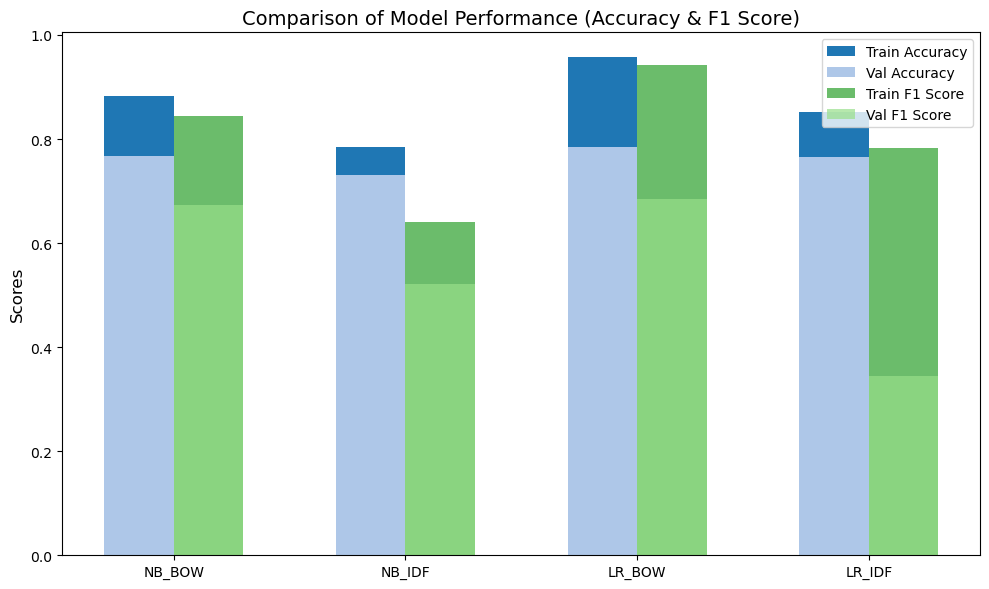

In [ ]:
model_names = results_models.index

train_accuracy = results_models['Train Accuracy']
val_accuracy = results_models['Val Accuracy']
train_f1 = results_models['Train F1 Score']
val_f1 = results_models['Val F1 Score']

bar_width = 0.3
index = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(10, 6))

bar_tra = ax.bar(index - bar_width / 2, train_accuracy, bar_width, label='Train Accuracy', color='#1F77B4' )
bar_ta = ax.bar(index - bar_width / 2, val_accuracy, bar_width, label='Val Accuracy', color='#AEC7E8')

bar_trf = ax.bar(index + bar_width / 2, train_f1, bar_width, label='Train F1 Score', alpha=0.7, color= '#2CA02C' )
bar_tf = ax.bar(index + bar_width / 2, val_f1, bar_width, label='Val F1 Score', alpha=0.7, color='#98DF8A')

ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Model Performance (Accuracy & F1 Score)', fontsize=14)

ax.set_xticks(index)
ax.set_xticklabels(model_names)

ax.legend()

plt.tight_layout()
plt.show()


The best model is... so we will do the val set with those predictions

In [ ]:
#y_pred_val =lr.predict(X_val_tfidf)


# ids = pd.DataFrame(df_val.index) 
# predict_df = pd.DataFrame(y_pred_val, columns=['label'])

# final = pd.concat([ids, predict_df], axis=1)

# final.reset_index(drop=True, inplace=True)
# final.to_csv('df_val_prediction.csv', index=False)